In [14]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [15]:
import elastic
import constants
import potentials
import numpy as np
import pylab as plt



In [16]:
bigrhos=np.linspace(20,50,10)/constants.hcInEVAngstrom

In [17]:
r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)

aT=elastic.GetScatteringLength(rhos, pin, 0, constants.muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom
aH=elastic.GetScatteringLength(rhos, pin, 0, constants.muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom

sigT=elastic.GetCrossSection(rhos, pin, 0, constants.muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20
sigH=elastic.GetCrossSection(rhos, pin, 0, constants.muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20

In [18]:
print("T s-wave triplet scattering length in pm: " + str(aT[-1]))
print("H s-wave triplet scattering length in pm: " + str(aH[-1]))

print("T s-wave triplet cross section in m^2: " + str(sigT[-1]))
print("H s-wave triplet cross section in m^2: " + str(sigH[-1]))

T s-wave triplet scattering length in pm: -41.849236929807276
H s-wave triplet scattering length in pm: 0.7119145922352029
T s-wave triplet cross section in m^2: 4.4016443286864636e-16
H s-wave triplet cross section in m^2: 1.2737835892279595e-19


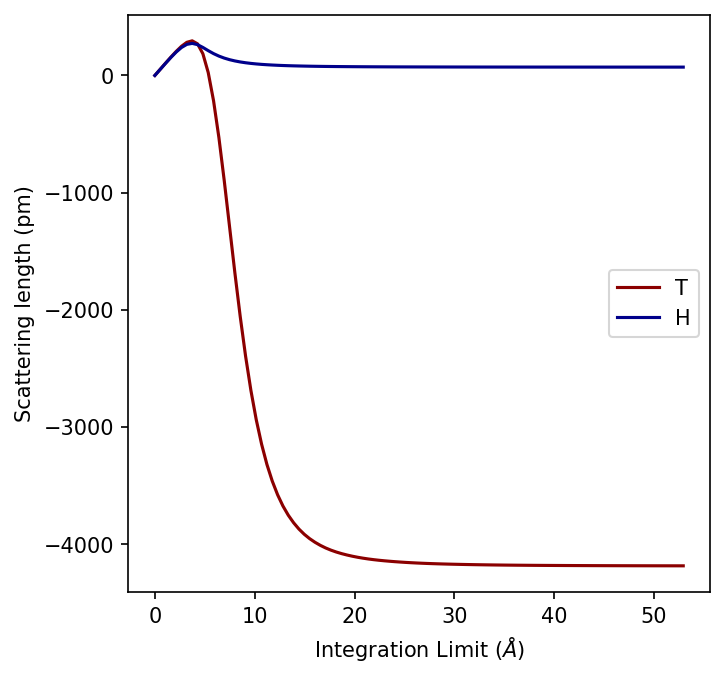

In [19]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel(r"Integration Limit ($\AA$)")
plt.ylabel("Scattering length (pm)")
plt.plot(rhos*constants.hcInEVAngstrom,aT*100,label='T',color='DarkRed')
plt.plot(rhos*constants.hcInEVAngstrom,aH*100,label='H',color='DarkBlue')
plt.legend(loc='center right')


In [27]:
ms=np.linspace(0.1,4,100)
aVsM=[]
for m in ms:
    mu=m*constants.DaltonInEV/2
    aVsM.append(elastic.GetScatteringLength(rhos, pin, 0, mu, potentials.Silvera_Triplet, 'Radau')[-1]*constants.hcInEVAngstrom*100)

(0.0, 4.0)

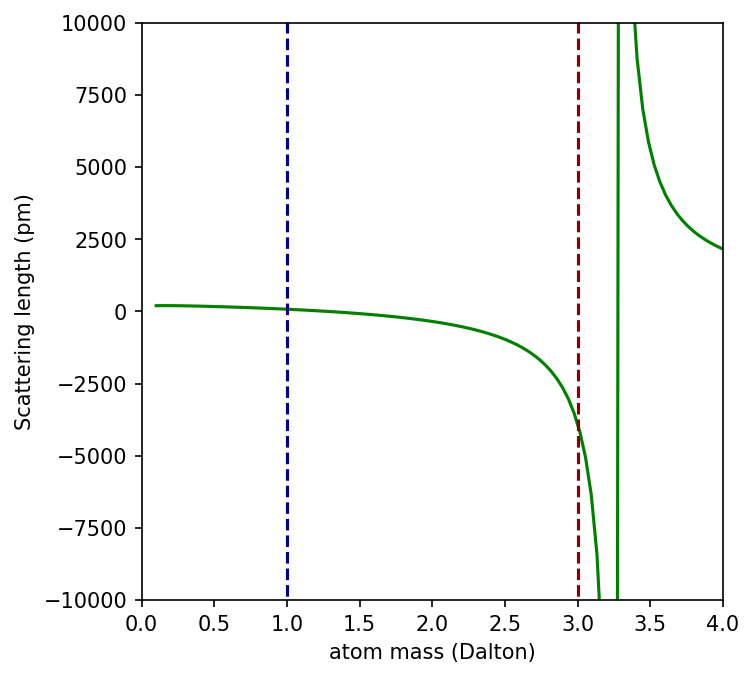

In [35]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("atom mass (Dalton)")
plt.ylabel("Scattering length (pm)")
plt.plot(ms,aVsM,color='green')
plt.plot([1,1],[-100000,45000],'--',color='DarkBlue')
plt.plot([3,3],[-100000,45000],'--',color='DarkRed')
plt.ylim(-10000,10000)
plt.xlim(0,4)